In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

pd.set_option('display.max_columns', 50)

## Functions needed

In [23]:
# For successive substitution method

# Single Variable

def ssfn1(x): return 2*math.sin(x)

def ssfn2(x): 
    x1,x2 = x
    # 2 functions
    return ((math.log(x2/1404.6)/math.log(0.97)),(math.sqrt((x1-9.8)/(1.1368*(10**-4)))))  
    # One function
    #return 

    
# For Newton-Raphson method

def nrfn(x): return math.log(x) - 6.949 + (3.46*(10**-6))*(x**2)
def derivative(x): return (1/x) + (6.92*(10**-6))*x
#Functions for NR for multiple variables
def nrfn1(x,y,z): return x**3 + 3*y**2 -24.6
def nrfn2(x,y,z): return x**2 + 2*y + 2
def nrfn3(x,y,z): return z
def J(x,y,z): return np.array([[3*x**2,6*y,0],
                               [2*x,2,0],
                               [0,0,1]])

# Successive substitution Method

### Single Variable

In [22]:
ITERATION  = 10
INITIAL = 1.0

iterNo = np.arange(1,ITERATION+1)

# For 1 variable 

Xi = []
Xi1 = []

norm = []

# For 2 variables 

#X1i = []
#X2i = []
#X1i1 = []
#X2i1 = []

curr = INITIAL
for _ in iterNo:
    
    # For 2 variables
    
    #x1,x2 = curr
    #X1i.append(x1)
    #X2i.append(x2)
    #curr = ssfn(curr)
    #X1i1.append(curr[0])
    #X2i1.append(curr[1])
    #norm.append((((X1i1[-1] - X1i[-1])/X1i[-1])**2)+(((X2i1[-1] - X2i[-1])/X2i[-1])**2))
    
    # For 1 variable 
    
    Xi.append(curr)
    curr = ssfn1(curr)
    Xi1.append(curr)
    norm.append((Xi1[-1] - Xi[-1])**2)
    
df = pd.DataFrame(np.array([iterNo,Xi,Xi1,norm]).T, columns=['IterNo','Xi','Xi+1','Norm'])
#df = pd.DataFrame(np.array([iterNo,X1i,X2i,X1i1,X2i1,norm]).T, columns=['IterNo','X1i','X2i','X1(i+1)','X2(i+1)','Norm'])
df.set_index('IterNo',inplace=True)
df

,Xi,Xi+1,Norm
IterNo,,,
1.0,1.000000,1.682942,0.466410
2.0,1.682942,1.987437,0.092717
3.0,1.987437,1.828908,0.025131
4.0,1.828908,1.933748,0.010991
5.0,1.933748,1.869706,0.004101
6.0,1.869706,1.911316,0.001731
7.0,1.911316,1.885162,0.000684
8.0,1.885162,1.901985,0.000283
9.0,1.901985,1.891313,0.000114


### Multiple Variables - 2

In [7]:
ITERATION  = 10
INITIAL = (70.0,1000.0)

iterNo = np.arange(1,ITERATION+1)

# For 1 variable 

#Xi = []
#Xi1 = []

norm = []

# For 2 variables 

X1i = []
X2i = []
X1i1 = []
X2i1 = []

curr = INITIAL
for _ in iterNo:
    
    # For 2 variables
    
    x1,x2 = curr
    X1i.append(x1)
    X2i.append(x2)
    curr = ssfn2(curr)
    X1i1.append(curr[0])
    X2i1.append(curr[1])
    norm.append((((X1i1[-1] - X1i[-1])/X1i[-1])**2)+(((X2i1[-1] - X2i[-1])/X2i[-1])**2))
    
    # For 1 variable 
    
    #Xi.append(curr)
    #curr = ssfn(curr)
    #Xi1.append(curr)
    #norm.append((Xi1[-1] - Xi[-1])**2)
    
#df = pd.DataFrame(np.array([iterNo,Xi,Xi1,norm]).T, columns=['IterNo','Xi','Xi+1','Norm'])
df = pd.DataFrame(np.array([iterNo,X1i,X2i,X1i1,X2i1,norm]).T, columns=['IterNo','X1i','X2i','X1(i+1)','X2(i+1)','Norm'])
df.set_index('IterNo',inplace=True)
df

,X1i,X2i,X1(i+1),X2(i+1),Norm
IterNo,,,,,
1.0,70.000000,1000.000000,11.154347,727.706431,0.780840
2.0,11.154347,727.706431,21.589863,109.149793,1.597780
3.0,21.589863,109.149793,83.875677,322.041881,12.127260
4.0,83.875677,322.041881,48.354057,807.227192,2.449171
5.0,48.354057,807.227192,18.185066,582.361971,0.466873
6.0,18.185066,582.361971,28.904746,271.588391,0.632258
7.0,28.904746,271.588391,53.948225,409.947836,1.010208
8.0,53.948225,409.947836,40.430399,623.181559,0.333340
9.0,40.430399,623.181559,26.680600,519.080001,0.143563


# Newton Raphson Method


### Single Variable

In [8]:
# Newton Raphson Method

ITERATION = 6
INITIAL = 1000

iterNo = np.arange(1,ITERATION+1)
Xi = []
fXi = []
dervXi = []
Xi1 = []
norm = []

curr = INITIAL
for _ in iterNo:
    Xi.append(curr)
    
    fXi.append(nrfn(curr))
    dervXi.append(derivative(curr))
    
    curr = curr - fXi[-1]/dervXi[-1]
    
    Xi1.append(curr)
    
    norm.append((Xi1[-1] - Xi[-1])**2)
    
df = pd.DataFrame(np.array([iterNo,Xi,fXi,dervXi,Xi1,norm]).T, columns=['IterNo','Xi','f(Xi)','derv(Xi)','Xi+1','Norm'])
df.set_index('IterNo',inplace=True)
df

,Xi,f(Xi),derv(Xi),Xi+1,Norm
IterNo,,,,,
1.0,1000.000000,3.418755e+00,0.007920,568.338980,1.863312e+05
2.0,568.338980,5.113299e-01,0.005692,478.512519,8.068793e+03
3.0,478.512519,1.393321e-02,0.005401,475.932828,6.654810e+00
4.0,475.932828,8.441414e-06,0.005395,475.931263,2.448574e-06
5.0,475.931263,3.066880e-12,0.005395,475.931263,3.231821e-19
6.0,475.931263,0.000000e+00,0.005395,475.931263,0.000000e+00


### Multiple variables

In [25]:
ITERATION = 5
INITIAL = (1,-1,0)

iterNo = np.arange(1,ITERATION+1)
Xi = []
Xi1 = []
Ds = []
Js = []
Delta = []
Err = []

curr = np.array(INITIAL)
for _ in iterNo:
    Xi.append(curr)
    Js.append(J(*curr))
    
    Ds.append([-nrfn1(*curr),-nrfn2(*curr),-nrfn3(*curr)])
    delta = np.matmul(np.linalg.inv(Js[-1]),Ds[-1])
    Delta.append(delta)
    
    Xi1.append(curr+delta)
    Err.append(sum(np.nan_to_num((delta/curr)**2)))
    curr = Xi1[-1]

df = pd.DataFrame({'iterNo':iterNo,
                   'Xi':np.array(Xi)[:,0],'Yi':np.array(Xi)[:,1],'Zi':np.array(Xi)[:,2],
                   'f1':-np.array(Ds)[:,0],'f2':-np.array(Ds)[:,1],'f3':-np.array(Ds)[:,2],
                   'df1/dx1':np.array(Js)[:,0][:,0],'df1/dx2':np.array(Js)[:,0][:,1],'df1/dx3':np.array(Js)[:,0][:,2],
                   'df2/dx1':np.array(Js)[:,1][:,0],'df2/dx2':np.array(Js)[:,1][:,1],'df2/dx3':np.array(Js)[:,1][:,2],
                   'df3/dx1':np.array(Js)[:,2][:,0],'df3/dx2':np.array(Js)[:,2][:,1],'df3/dx3':np.array(Js)[:,2][:,2],
                   'del1':np.array(Delta)[:,0],'del2':np.array(Delta)[:,1],'del3':np.array(Delta)[:,2],
                   'Xi+1':np.array(Xi1)[:,0],'Yi+1':np.array(Xi1)[:,1],'Zi+1':np.array(Xi1)[:,2],
                   'Error':Err})
df.set_index('iterNo',inplace=True)
#df.drop(columns=['Zi','f3','df1/dx3','df2/dx3','df3/dx1','df3/dx2','df3/dx3','del3','Zi+1'])
df

/tmp/ipykernel_61822/1090177868.py:22: RuntimeWarning: invalid value encountered in true_divide
  Err.append(sum(np.nan_to_num((delta/curr)**2)))


,Xi,Yi,Zi,f1,f2,f3,df1/dx1,df1/dx2,df1/dx3,df2/dx1,df2/dx2,df2/dx3,df3/dx1,df3/dx2,df3/dx3,del1,del2,del3,Xi+1,Yi+1,Zi+1,Error
iterNo,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-1.000000,0.0,-20.600000,1.000000,-0.0,3.000000,-6.000000,0.0,2.000000,2.0,0.0,0.0,0.0,1.0,1.955556,-2.455556,0.0,2.955556,-3.455556,0.0,9.853951e+00
2,2.955556,-3.455556,0.0,37.040283,3.824198,0.0,26.205926,-20.733333,0.0,5.911111,2.0,0.0,0.0,0.0,1.0,-0.876550,0.678593,0.0,2.079006,-2.776963,0.0,1.265219e-01
3,2.079006,-2.776963,0.0,7.520585,0.768339,0.0,12.966796,-16.661778,0.0,4.158012,2.0,0.0,0.0,0.0,1.0,-0.292428,0.223790,0.0,1.786578,-2.553173,0.0,2.627896e-02
4,1.786578,-2.553173,0.0,0.658591,0.085514,0.0,9.575583,-15.319040,0.0,3.573156,2.0,0.0,0.0,0.0,1.0,-0.035556,0.020766,0.0,1.751022,-2.532407,0.0,4.622335e-04
5,1.751022,-2.532407,0.0,0.008025,0.001264,0.0,9.198234,-15.194442,0.0,3.502044,2.0,0.0,0.0,0.0,1.0,-0.000492,0.000230,0.0,1.750530,-2.532177,0.0,8.732529e-08


# Gauss Seidel

In [13]:
# Equations to be solved

f1 = lambda x,y,z,a: 0.25*(y+a+164.562)
f2 = lambda x,y,z,a: 0.25*(x+z+154.562)
f3 = lambda x,y,z,a: 0.25*(y+a+224.562)
f4 = lambda x,y,z,a: 0.25*(x+z+234.562) #change

# Initialisation 
x0, y0, z0, a0 = 50,50,50,50 #change

iteration = 0
iteration_list, x_values, y_values, z_values, a_values = [iteration], [x0], [y0], [z0], [a0] #change

# Specify error
error = 0.0001
error_list = [None]

# Gauss Seidel
condition = True

while condition:

    x1 = f1(x0,y0,z0,a0)
    y1 = f2(x1,y0,z0,a0)
    z1 = f3(x1,y1,z0,a0)
    a1 = f4(x1,y1,z1,a0) #change


    error_x = (x0-x1)**2
    error_y = (y0-y1)**2
    error_z = (z0-z1)**2
    error_a = (a0-a1)**2 #change

    error_total = error_x + error_y +error_z+error_a #change
    
    iteration += 1

    x0, y0, z0, a0 = x1, y1, z1, a1 #change

    iteration_list.append(iteration)

    x_values.append(x0)
    y_values.append(y0)
    z_values.append(z0)
    a_values.append(a0) #change

    error_list.append(error_total)

    condition = error_total > error

In [14]:
from tabulate import tabulate

table = zip(iteration_list, x_values, y_values, z_values, a_values , error_list) #change
headers=['Iterations', 'X', 'Y', 'Z', 'A','Error'] #change
 
print(tabulate(table, headers=headers, floatfmt=".4f"))

  Iterations        X        Y         Z         A      Error
------------  -------  -------  --------  --------  ---------
           0  50.0000  50.0000   50.0000   50.0000
           1  66.1405  67.6756   85.5594   96.5655  4005.7584
           2  82.2008  80.5805  100.4270  104.2974   705.2983
           3  87.3600  85.5873  103.6117  106.3834    66.1781
           4  89.1332  86.8267  104.4430  107.0345     5.7955
           5  89.6058  87.1527  104.6873  107.2138     0.4215
           6  89.7321  87.2454  104.7553  107.2624     0.0315
           7  89.7674  87.2712  104.7739  107.2758     0.0024
           8  89.7773  87.2783  104.7790  107.2796     0.0002
           9  89.7800  87.2802  104.7805  107.2806     0.0000


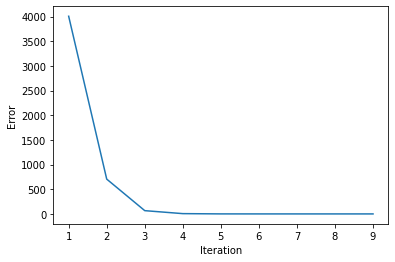

In [12]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
# naming the X axis and Y axis
plt.xlabel('Iteration')
plt.ylabel('Error')

# plot the data
ax.plot(iteration_list,error_list)
plt.show()